In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Study data files

# Read the data and the study results

# Display the data table for preview

In [73]:
# Create the X and Y axis lists

In [74]:
# Plot the charts

In [75]:
# Add labels to X and Y axes :: Add title

In [76]:
# Set the limits for the X and Y axes

In [77]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np

#Study data files
census_csv = Path("resources/census_data_2016-2019.csv")

#Read the data and the study results
bankloans_df = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\github\\Project-1\\bankloans.csv")

#Display the data table for preview
bankloans_df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [78]:
#Display cleaned data
bankloan_clean = bankloans_df.dropna()
bankloan_clean.count()

age         700
ed          700
employ      700
address     700
income      700
debtinc     700
creddebt    700
othdebt     700
default     700
dtype: int64

In [151]:
#Display 1 Values
highestdebt_df = bankloan_clean.sort_values(by= "debtinc", ascending=False)
highestdebt_df.head(15)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
373,33,1,14,8,72,41.3,15.016680,14.719320,1.0
583,37,3,16,14,50,36.6,7.320000,10.980000,1.0
122,34,4,6,3,27,35.3,1.982448,7.548552,1.0
584,25,4,0,1,18,33.4,2.801592,3.210408,1.0
492,28,1,0,2,28,33.3,2.284380,7.039620,1.0
654,36,1,11,2,33,32.5,1.265550,9.459450,0.0
381,48,1,13,20,50,30.8,6.113800,9.286200,1.0
637,31,1,7,11,41,30.7,2.995706,9.591294,1.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
419,47,1,19,7,50,30.1,3.175550,11.874450,0.0


In [152]:
#Step 1: Categorize the age groups
age_ranges = [0, 30, 40, 50, float('inf')]
labels = ['genz', 'mill', 'genx', 'boom']

#Categorizing the data into age groups
highestdebt_df['age_group'] = pd.cut(highestdebt_df['age'], bins=age_ranges, labels=labels)

#Step 2: Calculate the average debtinc for each age group
average_debtinc_by_age_group = highestdebt_df.groupby('age_group')['debtinc'].mean()

print(average_debtinc_by_age_group)

age_group
genz    10.328512
mill    10.175704
genx    10.123649
boom    11.334615
Name: debtinc, dtype: float64


In [153]:
age_ranges = [0, 25, 30, 35, 40, 45, float('inf')]
age_labels = ['<25', '25-30', '30-35', '35-40', '40-45', '>45']

# Categorizing the data into age ranges
highestdebt_df['age_range'] = pd.cut(highestdebt_df['age'], bins=age_ranges, labels=age_labels)

# Calculating the number of defaults in each age range
highestdebt_df = highestdebt_df.groupby('age_range')['default'].sum()
highestdebt_df


age_range
<25      40.0
25-30    46.0
30-35    35.0
35-40    26.0
40-45    15.0
>45      21.0
Name: default, dtype: float64

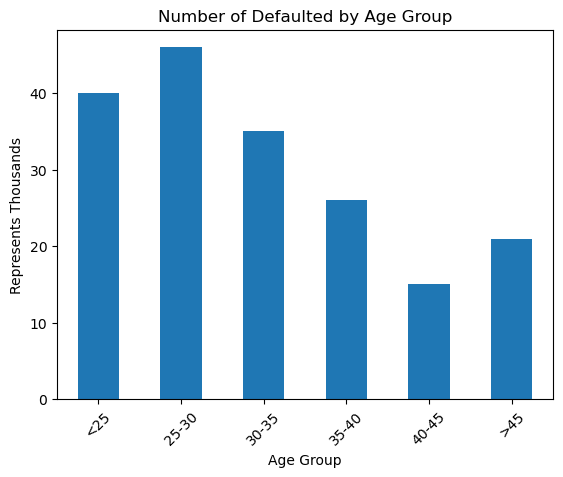

In [158]:
#Print the chart
highestdebt_df.plot(kind="bar", rot=45, xlabel="Age Group", ylabel="Represents Thousands", title="Number of Defaulted by Age Group")
plt.savefig('chart.png', format='png')
plt.show()